# Book Popularity Predictor(Group Number:100)                                                                     

In this project, we aim to leverage machine learning techniques to predict the popularity of books, measured 
by the number of copies sold. The dataset comprises 918 observations and 12 attributes, each representing 
various factors that could influence a book's popularity. The target variable for this supervised learning 
regression task is the number of books sold. 
To tackle this problem, we have selected two supervised learning algorithms: Linear Regression and 
Logistic Regression. These algorithms are chosen for their effectiveness in handling numerical data and 
their ability to produce interpretable results. By applying these algorithms, we aim to develop a predictive 
model that can assist publishers and booksellers in forecasting book sales, enabling them to make informed 
decisions regarding inventory management, marketing strategies, and resource allocation. This predictive 
tool will be invaluable in identifying potential bestsellers and optimizing the supply chain to meet market 
demand efficiently.  

## IMPORT NECESSORY LIBRARY AND LOAD DATASET

We have imported pandas, seaborn, matplotlib and numpy to train the model.
In the output the first few data records can be seen.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv('Books_data.csv')
data.head()

,Book Title,Author,Category,Price (TK),Stock Status,Copies Left,Book Length (Pages),Edition,Publication,Wished Users,Discount Offer,Ratings,Reviews
0,Sapiens A Brief History Of Humankind,Yuval Noah Harari,History and Tradition,"1,258",In Stock,4,498,1st Published,Vintage Books (India),386,Yes,39.0,16.0
1,The Intelligent Investor,Benjamin Graham,"Business, Investment and Economics","1,598",In Stock,6,640,8th Impression,Harpercollins Publishers (India),531,Yes,30.0,25.0
2,Madinah Arabic Reader 1,Dr. V. Abdur Rahim,Islamic Books,528,In Stock,21,80,1st Edition 2011,Goodword Books (India),NaN,Yes,6.0,3.0
3,The Quran,M.A.S. Abdel Haleem (Translator),Islamic Books,950,In Stock,38,512,Reissue Edition,"Oxford University Press, USA",NaN,Yes,19.0,5.0
4,"Let Us C, 19th Edition",Yashavant Kanetkar,Computer Science & Engineering,718,In Stock,18,492,19th Edition,BPB Publications (India),NaN,Yes,3.0,1.0


## CHECKING FOR MISSING VALUES IN THE DATA SET
When the data set was checked for missing values, for the "Wished Users" there were 21 missing value; significantly higher than other attributes hence those respective rows were dropped and for the "Raitings" and "Reviews" missing values were substitued with the mean values.

In [9]:
# Checking for missing values in the dataset
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
Book Title              0
Author                  0
Category                0
Price (TK)              0
Stock Status            0
Copies Left             0
Book Length (Pages)     0
Edition                 0
Publication             1
Wished Users           21
Discount Offer          0
Ratings                 2
Reviews                 2
dtype: int64


In [11]:
# Dropping rows where 'Wished Users' has missing values
data = data.dropna(subset=['Wished Users'])
# Display cleaned data
data.head()

,Book Title,Author,Category,Price (TK),Stock Status,Copies Left,Book Length (Pages),Edition,Publication,Wished Users,Discount Offer,Ratings,Reviews
0,Sapiens A Brief History Of Humankind,Yuval Noah Harari,History and Tradition,"1,258",In Stock,4,498,1st Published,Vintage Books (India),386,Yes,39.0,16.0
1,The Intelligent Investor,Benjamin Graham,"Business, Investment and Economics","1,598",In Stock,6,640,8th Impression,Harpercollins Publishers (India),531,Yes,30.0,25.0
6,War And Peace,"Leo Tolstoy, Richard Pevear (Translator), Lari...",Novel,"1,618",In Stock,11,1276,1st Edition,Vintage Classics (India),108,Yes,9.0,2.0
16,One Hundred Years of Solitude,Gabriel Garcia Marquez,Novel,798,In Stock,7,422,5th Edition,Penguin Books (India),374,Yes,23.0,5.0
17,A Thousand Splendid Suns,Khaled Hosseini,Novel,"1,198",In Stock,8,419,1st Edition,Bloomsbury Publishing (India),277,Yes,27.0,13.0


## Below steps are for the dropping and getting mean values for missing values. Output shows the processed data set.

In [13]:
# Stripping any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# List of numerical columns (excluding 'Wished Users')
numerical_columns = ['Price (TK)', 'Copies Left', 'Book Length (Pages)', 'Ratings', 'Reviews']

# Cleaning and filling missing values for the selected numerical columns
for column in numerical_columns:
    # Remove commas, convert to numeric, and force errors to missing values
    data[column] = pd.to_numeric(data[column].replace({',': ''}, regex=True), errors='coerce')
    
    # Fill those missing values with the mean of the column
    data[column] = data[column].fillna(data[column].mean())

# Converting 'Wished Users' to numeric
data['Wished Users'] = pd.to_numeric(data['Wished Users'].replace({',': ''}, regex=True), errors='coerce')

# Dropping rows with missing 'Publication' values
data = data.dropna(subset=['Publication'])

# Verifying if there are any remaining missing values
print(data.isnull().sum())

# Display cleaned data
data.head()


Book Title             0
Author                 0
Category               0
Price (TK)             0
Stock Status           0
Copies Left            0
Book Length (Pages)    0
Edition                0
Publication            0
Wished Users           0
Discount Offer         0
Ratings                0
Reviews                0
dtype: int64


,Book Title,Author,Category,Price (TK),Stock Status,Copies Left,Book Length (Pages),Edition,Publication,Wished Users,Discount Offer,Ratings,Reviews
0,Sapiens A Brief History Of Humankind,Yuval Noah Harari,History and Tradition,1258,In Stock,4.0,498,1st Published,Vintage Books (India),386,Yes,39.0,16.0
1,The Intelligent Investor,Benjamin Graham,"Business, Investment and Economics",1598,In Stock,6.0,640,8th Impression,Harpercollins Publishers (India),531,Yes,30.0,25.0
6,War And Peace,"Leo Tolstoy, Richard Pevear (Translator), Lari...",Novel,1618,In Stock,11.0,1276,1st Edition,Vintage Classics (India),108,Yes,9.0,2.0
16,One Hundred Years of Solitude,Gabriel Garcia Marquez,Novel,798,In Stock,7.0,422,5th Edition,Penguin Books (India),374,Yes,23.0,5.0
17,A Thousand Splendid Suns,Khaled Hosseini,Novel,1198,In Stock,8.0,419,1st Edition,Bloomsbury Publishing (India),277,Yes,27.0,13.0


## Before removing outliers : Discriptive Statistics

Descriptive Statistics:
        Price (TK)  Copies Left  Book Length (Pages)  Wished Users    Ratings  \
count    19.000000    19.000000            19.000000     19.000000  19.000000   
mean    795.168421    14.477193           313.921053    512.052632  33.509942   
std     497.543996    13.693222           173.207751    313.874439  20.058040   
min     175.200000     0.000000            95.900000    108.000000   4.600000   
25%     401.500000     5.000000           191.000000    341.000000  21.000000   
50%     798.000000     9.000000           312.000000    412.000000  33.888889   
75%    1198.000000    20.833333           385.500000    589.500000  42.000000   
max    1600.000000    40.400000           703.600000   1470.000000  74.200000   

         Reviews  
count  19.000000  
mean   15.021637  
std     9.665850  
min     1.800000  
25%     5.500000  
50%    16.111111  
75%    23.500000  
max    31.500000  


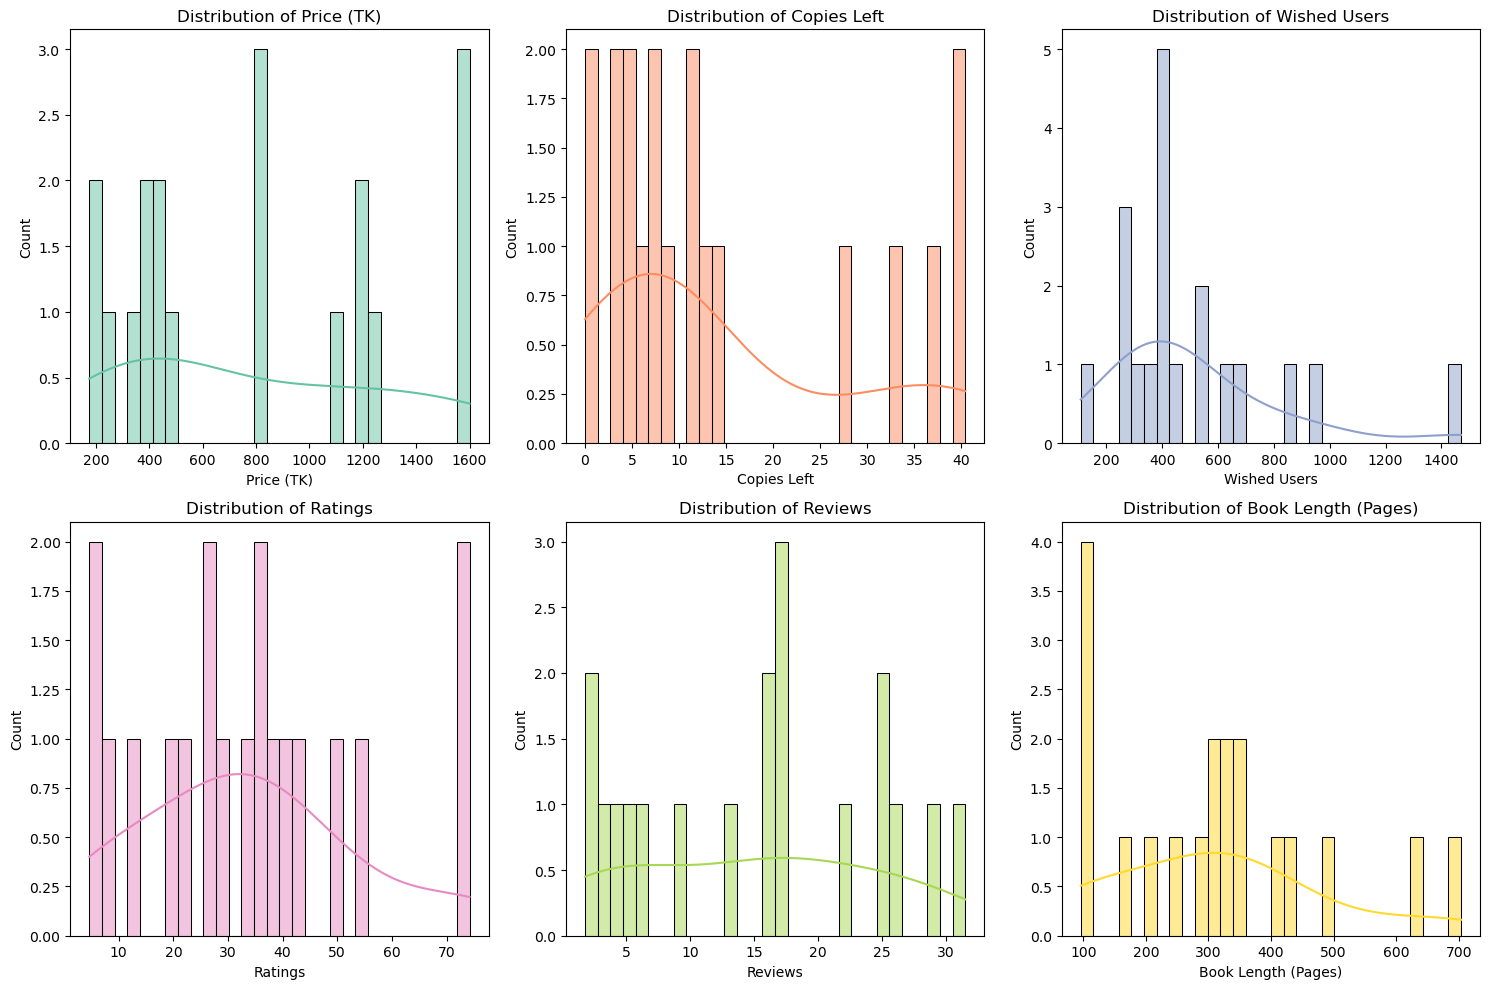

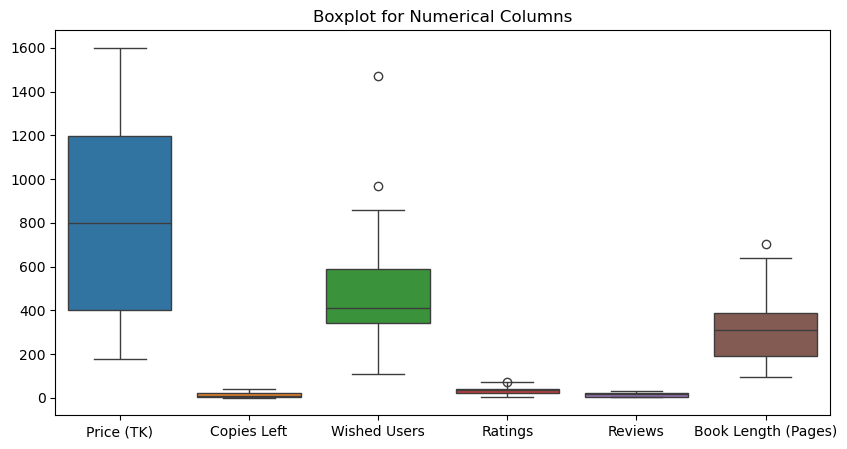

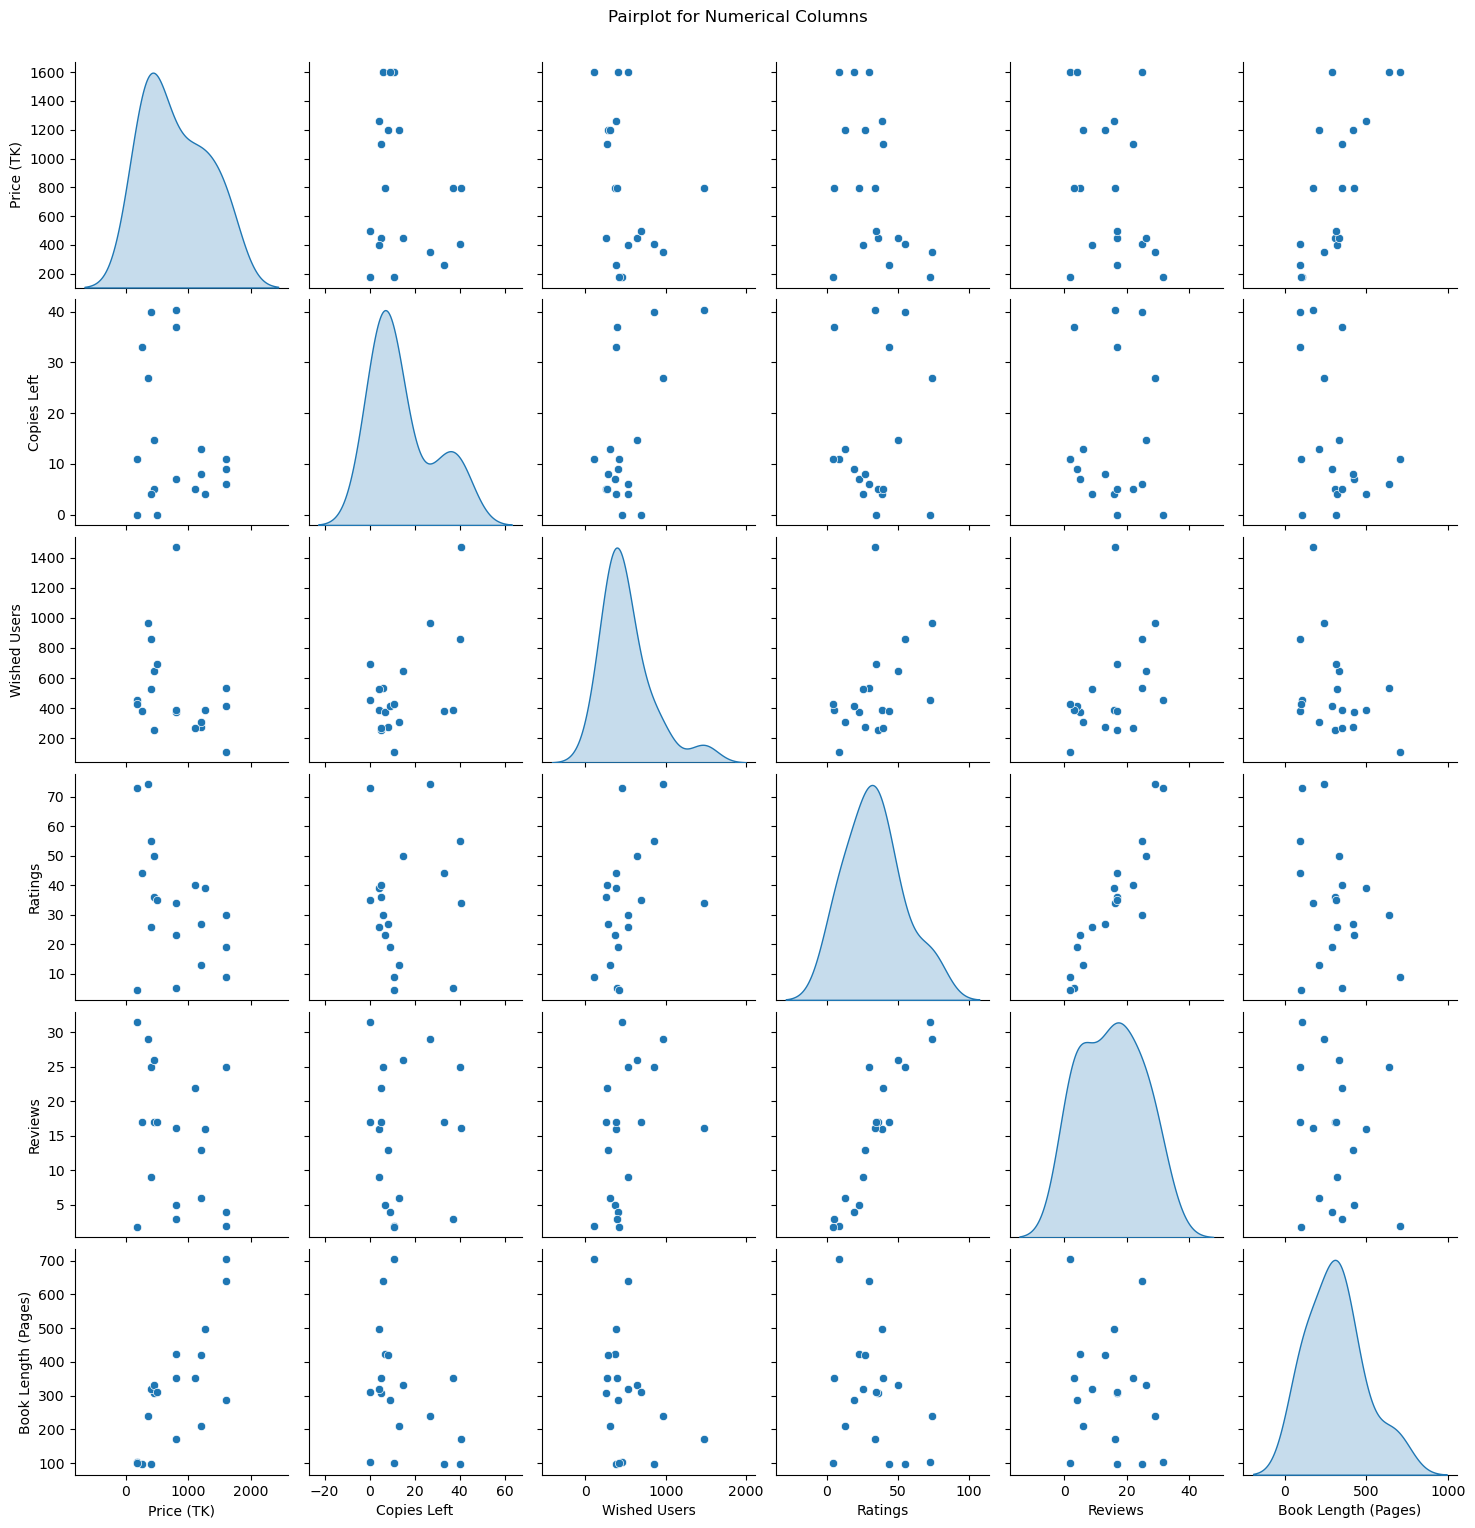

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Visualizations
plt.figure(figsize=(15, 10))

# Histograms for all numerical columns
numerical_columns = ['Price (TK)', 'Copies Left', 'Wished Users', 'Ratings', 'Reviews', 'Book Length (Pages)']  # Include 'Book Length (Pages)'

# Create subplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color=sns.color_palette("Set2")[i-1])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Boxplot for all numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[numerical_columns])
plt.title('Boxplot for Numerical Columns')
plt.show()

# Scatter plot (pairplot) for all numerical columns
sns.pairplot(data[numerical_columns].dropna(), diag_kind='kde')
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

## Treating Outliers

In the next steps are executed in order to treat outliers and duplicates. This was done seperately for numerical values and categorical values.
For categorical values before treating the outliers, one hot encoding was performed in order to convert to nemerical values.
Feature scaling was also done here.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stripping spaces from column names to avoid issues
data.columns = data.columns.str.strip()

# Train-Test Split
X = data.drop(columns=['Wished Users'])  # Features (all columns except 'Wished Users')
y = data['Wished Users']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treating Outliers and Duplicate Records
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Identifying numerical columns for outlier detection
numerical_columns_for_outliers = ['Price (TK)', 'Copies Left', 'Book Length (Pages)', 'Ratings', 'Reviews']

# Handling outliers by replacing values above the 95th percentile and below the 5th percentile with those thresholds
for column in numerical_columns_for_outliers:
    upper_limit = data[column].quantile(0.95)
    lower_limit = data[column].quantile(0.05)
    
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)

# Feature Scaling
# Separate the numeric columns from the categorical ones
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Only numeric columns
X_categorical = X.select_dtypes(exclude=['float64', 'int64'])  # Non-numeric columns

# Applying scaling only to the numeric columns
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Recombine the scaled numeric columns with the unscaled categorical columns
X_train_numeric_scaled = X_numeric_scaled[:len(X_train)]
X_test_numeric_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Combining the scaled numeric data with categorical columns for the final dataset
X_train_final = pd.concat([pd.DataFrame(X_train_numeric_scaled, columns=X_numeric.columns), X_categorical.loc[X_train.index]], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_numeric_scaled, columns=X_numeric.columns), X_categorical.loc[X_test.index]], axis=1)

# Handling Categorical Variables
X_train_final = pd.get_dummies(X_train_final, drop_first=True)
X_test_final = pd.get_dummies(X_test_final, drop_first=True)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stripping spaces from column names to avoid issues
data.columns = data.columns.str.strip()

# Train-Test Split
X = data.drop(columns=['Ratings'])  
y = data['Ratings']  

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output
print("First few rows of X_train:")
print(X_train.head())

# Treating Outliers and Duplicate Records
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Identifying numerical columns for outlier detection
numerical_columns_for_outliers = ['Price (TK)', 'Copies Left', 'Book Length (Pages)', 'Ratings', 'Reviews']

# Handling outliers by replacing values above the 95th percentile and below the 5th percentile with those thresholds
for column in numerical_columns_for_outliers:
    upper_limit = data[column].quantile(0.95)
    lower_limit = data[column].quantile(0.05)
    
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)

# Output
print("\nData after handling outliers:")
print(data[numerical_columns_for_outliers].describe())

# Feature Scaling
# Separate the numeric columns from the categorical ones
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Only numeric columns
X_categorical = X.select_dtypes(exclude=['float64', 'int64'])  # Non-numeric columns

# Output
print("\nNumeric columns (before scaling):")
print(X_numeric.head())

print("\nCategorical columns:")
print(X_categorical.head())

# Scaling only to the numeric columns
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Output
print("\nScaled numeric data (first few rows):")
print(pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns).head())

# Recombine the scaled numeric columns with the unscaled categorical columns
X_train_numeric_scaled = X_numeric_scaled[:len(X_train)]
X_test_numeric_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Combining the scaled numeric data with categorical columns for the final dataset
X_train_final = pd.concat([pd.DataFrame(X_train_numeric_scaled, columns=X_numeric.columns), X_categorical.loc[X_train.index]], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_numeric_scaled, columns=X_numeric.columns), X_categorical.loc[X_test.index]], axis=1)

# Output
print("\nFinal training data (scaled and combined with categorical data):")
print(X_train_final.head())

# Handling Categorical Variables using one hot ecoding
X_train_final = pd.get_dummies(X_train_final, drop_first=True)
X_test_final = pd.get_dummies(X_test_final, drop_first=True)

# Output
print("\nTraining data after One-Hot Encoding:")
print(X_train_final.head())

First few rows of X_train:
                             Book Title                  Author  \
25                          Animal Farm           George Orwell   
35                How To Talk To Anyone            Leil Lowndes   
16        One Hundred Years of Solitude  Gabriel Garcia Marquez   
32                 Who Moved My Cheese?         Spencer Johnson   
34  The Power of Your Subconscious Mind       Dr. Joseph Murphy   

                    Category  Price (TK) Stock Status  Copies Left  \
25                     Novel         258     In Stock         33.0   
35  Self-help and meditation         798     In Stock         37.0   
16                     Novel         798     In Stock          7.0   
32  Self-help and meditation         405     In Stock         40.0   
34  Self-help and meditation         500     In Stock          0.0   

    Book Length (Pages)      Edition                     Publication  \
25                   95  1st Edition  Fingerprint Publishing (India)   
35   


After removing outliers:
        Price (TK)  Copies Left  Book Length (Pages)  Wished Users    Ratings  \
count    15.000000    15.000000            15.000000     15.000000  15.000000   
mean    812.333333    13.111111           316.326667    448.733333  29.773333   
std     479.671266    12.807901           150.809106    173.572326  15.157246   
min     178.000000     0.000000            95.900000    252.000000   4.600000   
25%     427.500000     5.000000           249.000000    341.000000  21.000000   
50%     798.000000     8.000000           320.000000    388.000000  30.000000   
75%    1198.000000    13.833333           385.500000    529.500000  39.500000   
max    1598.000000    40.000000           640.000000    860.000000  55.000000   

         Reviews  
count  15.000000  
mean   13.786667  
std     8.540481  
min     1.800000  
25%     5.500000  
50%    16.000000  
75%    19.500000  
max    26.000000  


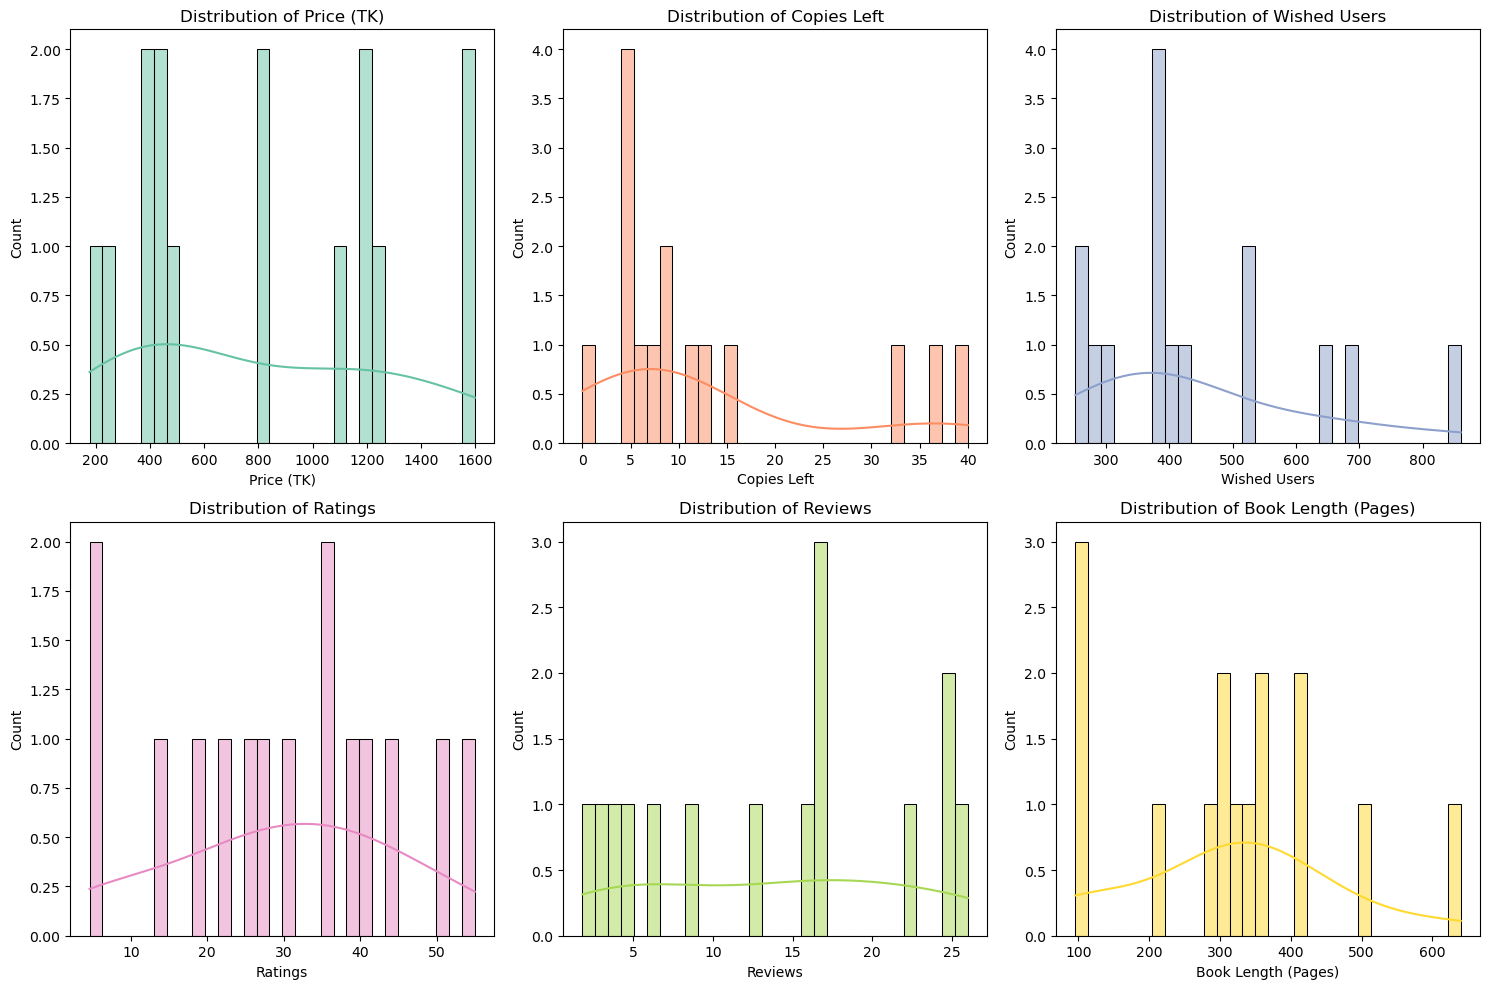

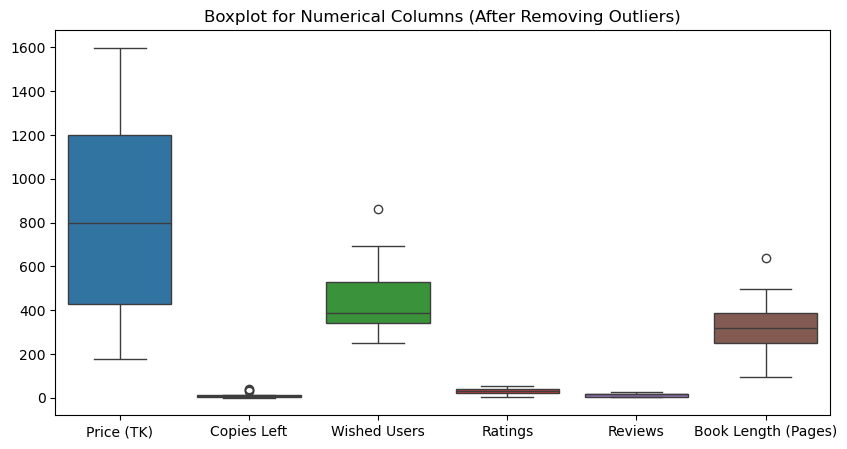

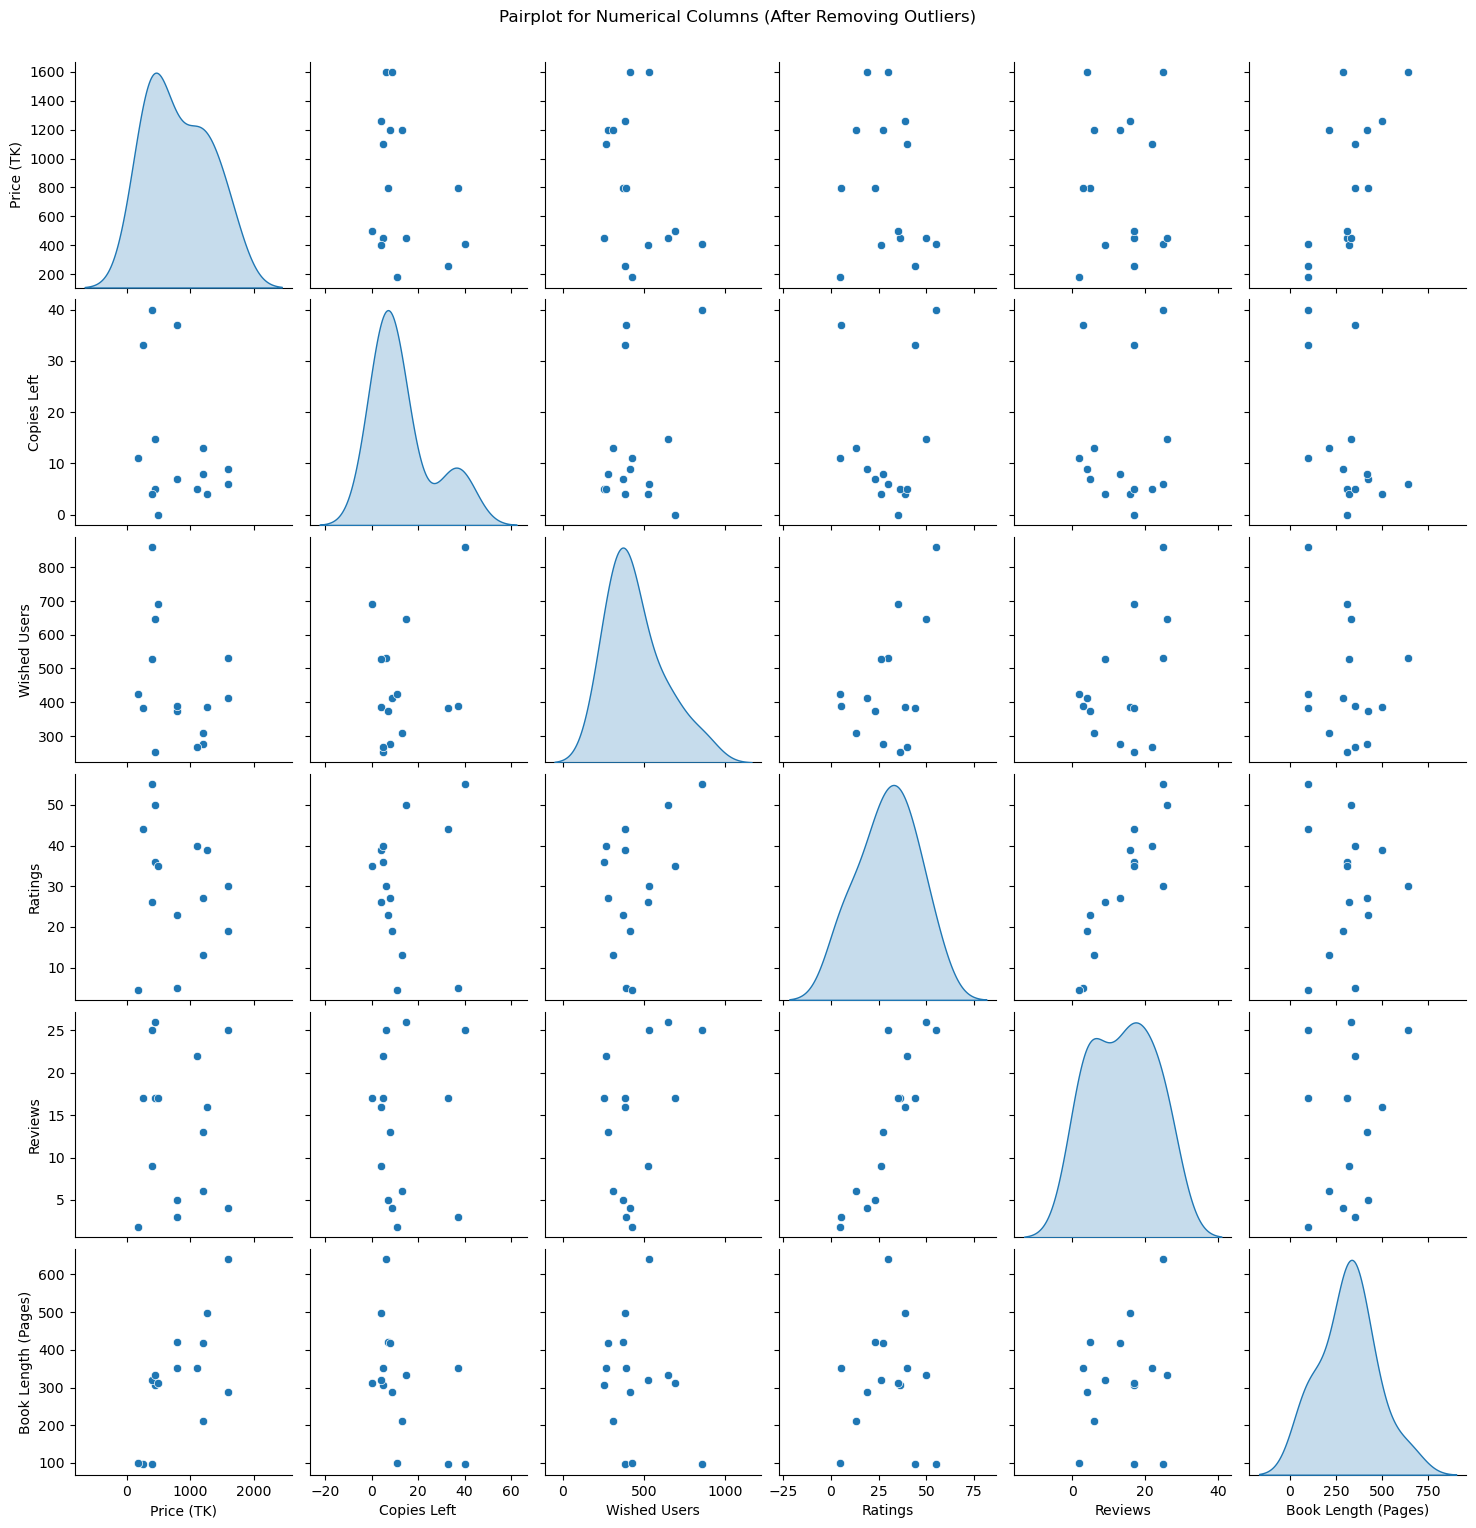

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converting all columns to numeric
numeric_columns = ['Price (TK)', 'Copies Left', 'Wished Users', 'Ratings', 'Reviews', 'Book Length (Pages)']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert non-numeric values to NaN

# Handling missing values before outlier removal
data = data.dropna(subset=numeric_columns)  # Drop rows with NaN in any of the numeric columns

# Detectin and removing outliers using the IQR method
clean_data = data.copy()
for col in numeric_columns:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]

# Showing descriptive statistics after removing outliers
print("\nAfter removing outliers:")
print(clean_data.describe())

# Visualization

# Histograms for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(clean_data[column], kde=True, bins=30, color=sns.color_palette("Set2")[i-1])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Boxplot for all numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=clean_data[numeric_columns])
plt.title('Boxplot for Numerical Columns (After Removing Outliers)')
plt.show()

# Scatter plot (pairplot) for all numerical columns
sns.pairplot(clean_data[numeric_columns].dropna(), diag_kind='kde')
plt.suptitle('Pairplot for Numerical Columns (After Removing Outliers)', y=1.02)
plt.show()


All the visualizations(Box Plot and Scatter plot) after removing outliers can be seen from the output of this data block. 

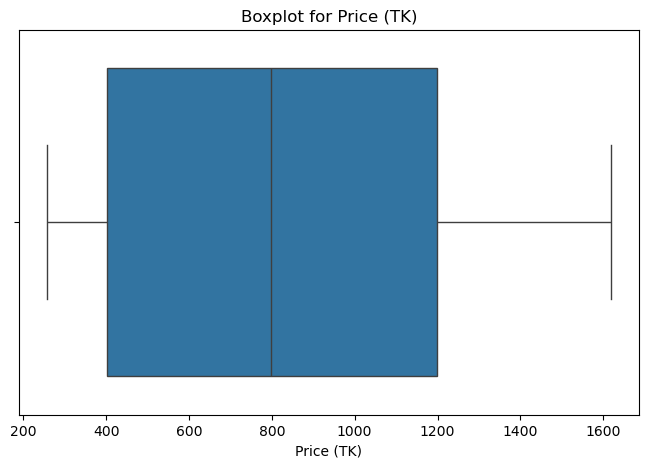

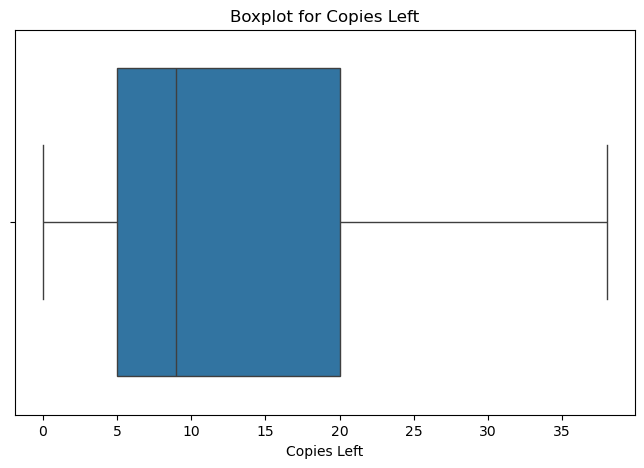

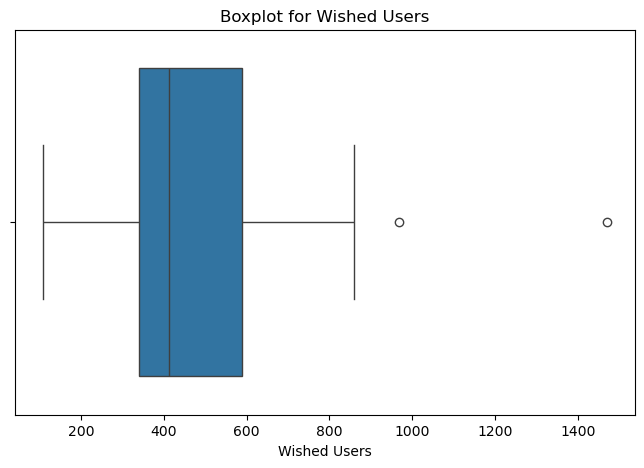

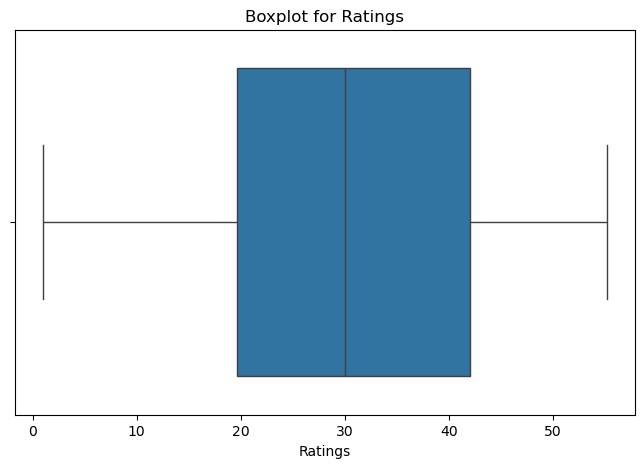

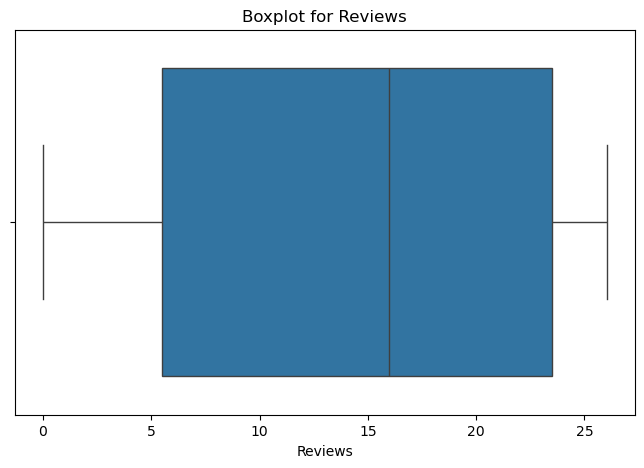

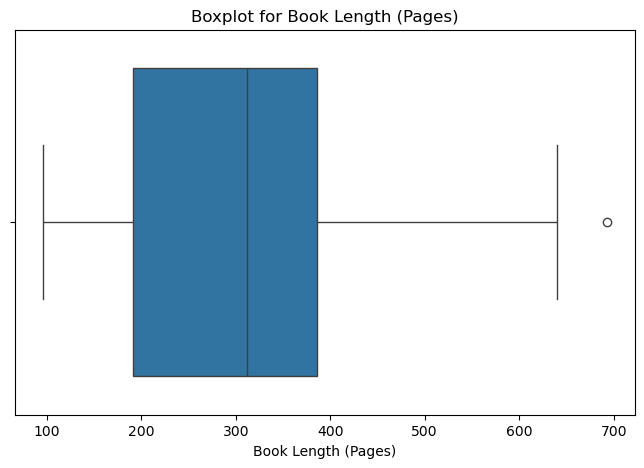


After removing outliers:
        Price (TK)  Copies Left  Book Length (Pages)  Wished Users    Ratings  \
count    17.000000    17.000000            17.000000     17.000000  17.000000   
mean    831.729412    11.931517           325.973529    428.941176  29.834118   
std     504.842416    12.108867           177.380210    182.215693  16.747322   
min     257.200000     0.000000            95.990000    108.000000   1.000000   
25%     405.000000     5.000000           210.000000    308.000000  19.000000   
50%     798.000000     8.000000           320.000000    388.000000  30.000000   
75%    1198.000000    11.815789           419.000000    528.000000  40.000000   
max    1618.000000    38.020000           692.560000    860.000000  55.180000   

         Reviews  
count  17.000000  
mean   13.707647  
std     9.206886  
min     0.000000  
25%     5.000000  
50%    16.000000  
75%    22.000000  
max    26.030000  


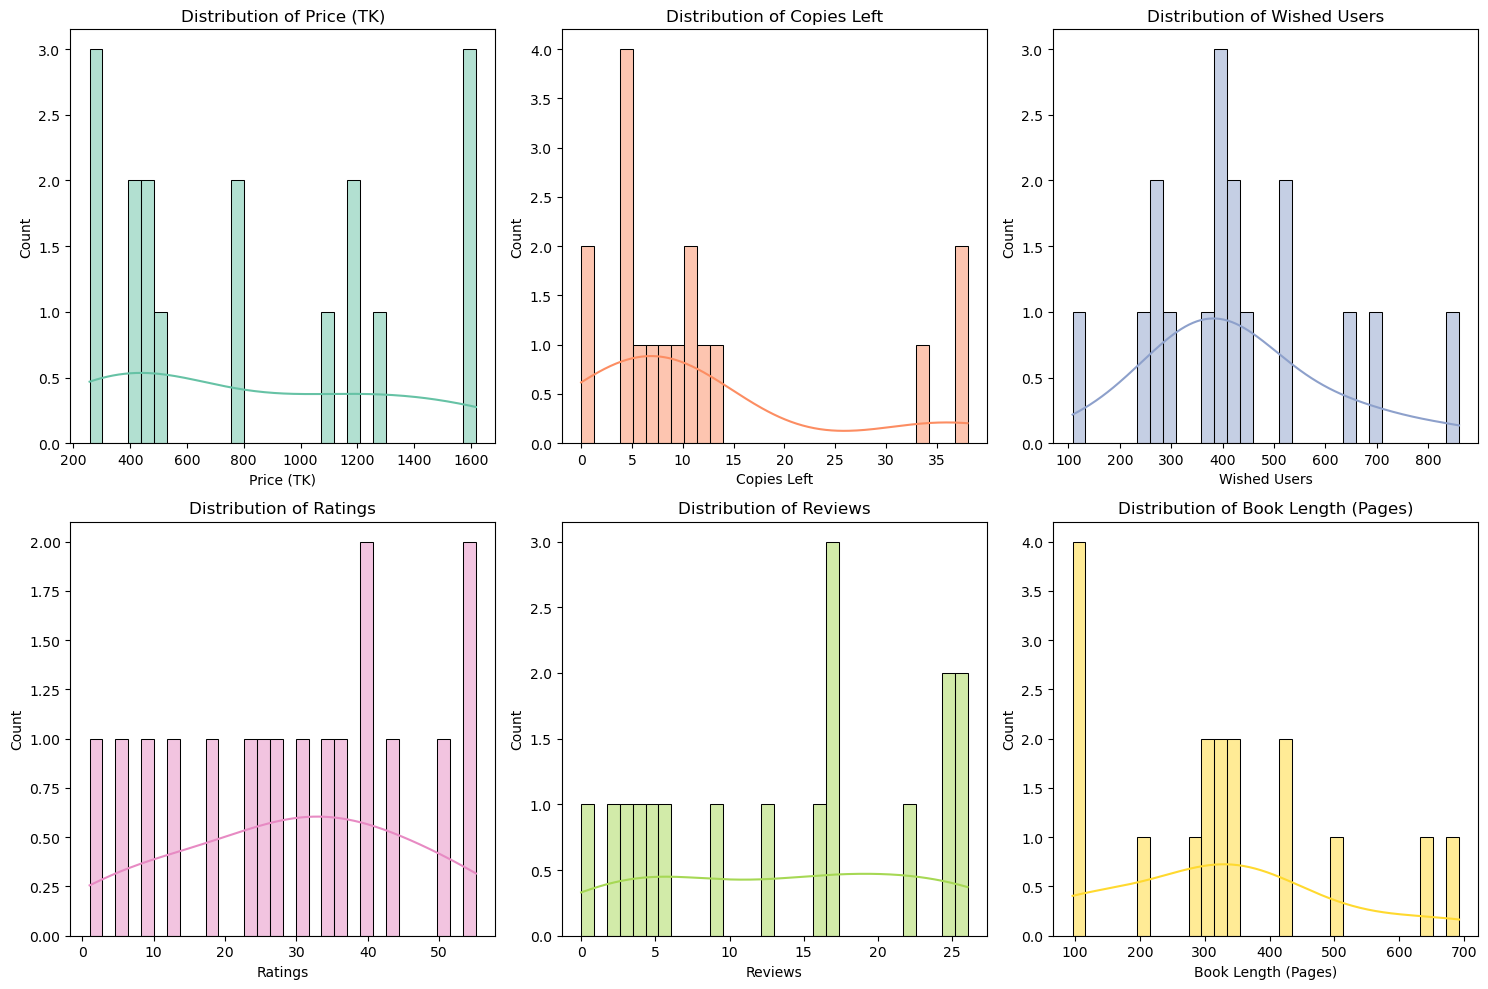

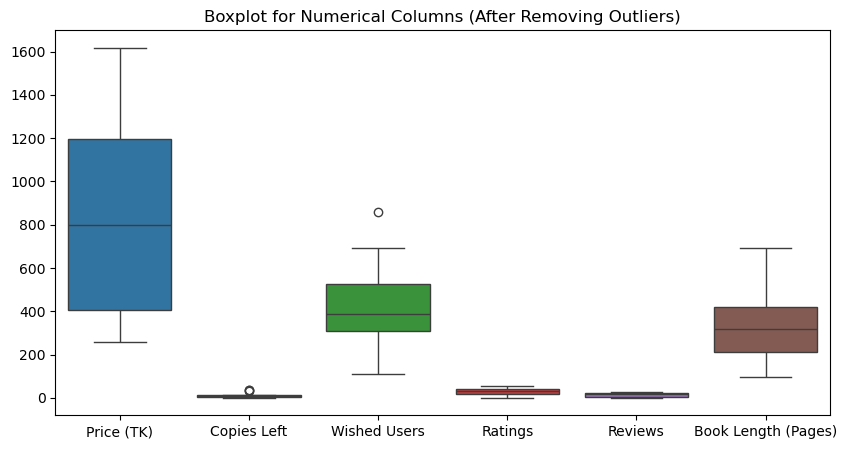

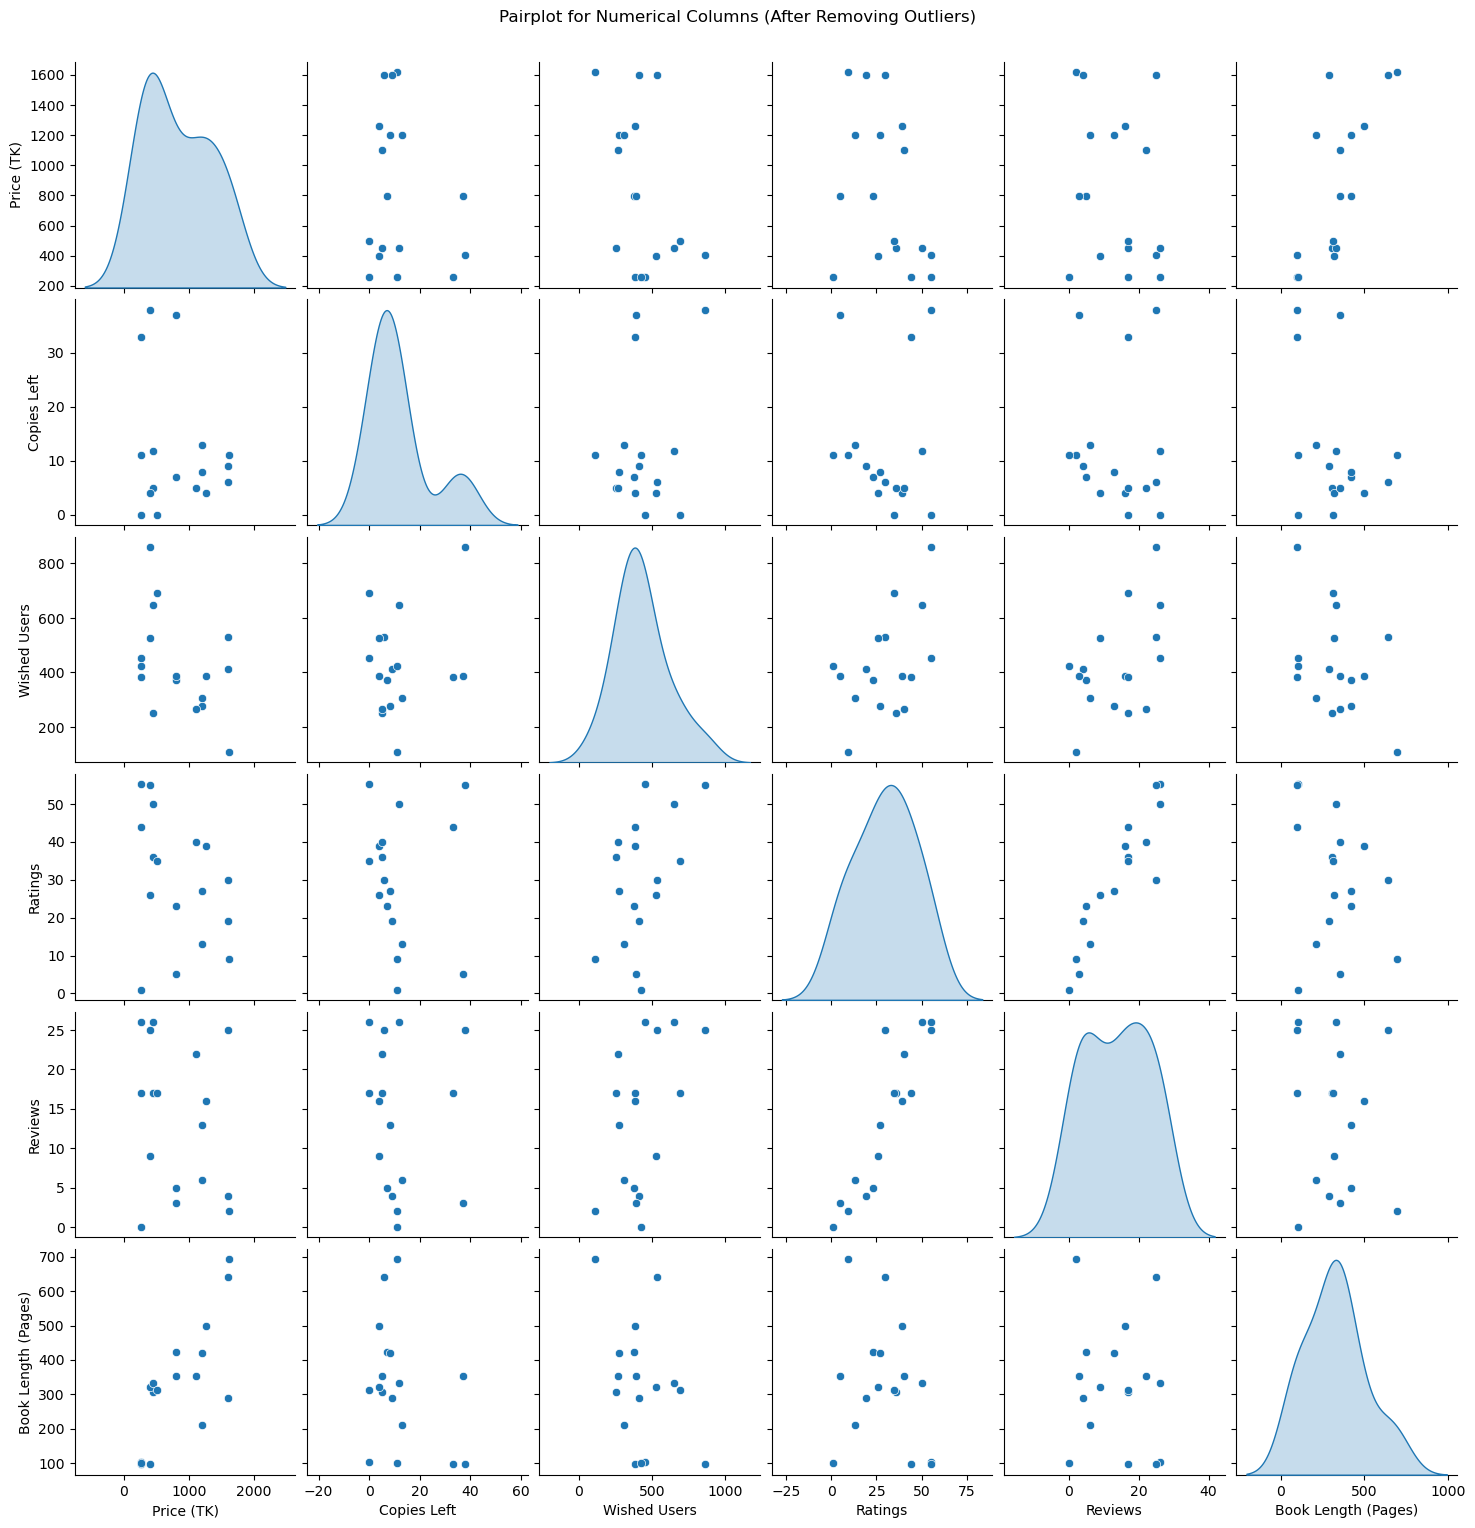

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using boxplots
numeric_columns = ['Price (TK)', 'Copies Left', 'Wished Users', 'Ratings', 'Reviews', 'Book Length (Pages)']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Detecting and removing outliers using the IQR method
clean_data = data.copy()  # Keep the original data intact

for col in numeric_columns:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers but keep at least one value to avoid missing values
    if not clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)].empty:
        clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]

# Show descriptive statistics after removing outliers
print("\nAfter removing outliers:")
print(clean_data.describe())

# Visualizations (Replot after removing outliers)

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(clean_data[column], kde=True, bins=30, color=sns.color_palette("Set2")[i-1])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Boxplot for all numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=clean_data[numeric_columns])
plt.title('Boxplot for Numerical Columns (After Removing Outliers)')
plt.show()

# Scatter plot (pairplot) for all numerical columns
sns.pairplot(clean_data[numeric_columns].dropna(), diag_kind='kde')
plt.suptitle('Pairplot for Numerical Columns (After Removing Outliers)', y=1.02)
plt.show()


## Correlation Matrix

In the following steps the correlation matrix was generated in order to select features. According to the correlation matrix the attributes "Ratings" and "Reviews" have the same coeffiecient. Hence "Reviews" feature can be dropped and other features can be used for the model.

Correlation Matrix:
                     Price (TK)  Copies Left  Wished Users   Ratings  \
Price (TK)             1.000000    -0.233738     -0.330872 -0.417621   
Copies Left           -0.233738     1.000000      0.534834  0.002930   
Wished Users          -0.330872     0.534834      1.000000  0.273368   
Ratings               -0.417621     0.002930      0.273368  1.000000   
Reviews               -0.292457    -0.039205      0.272448  0.924089   
Book Length (Pages)    0.732437    -0.399629     -0.394165 -0.259297   

                      Reviews  Book Length (Pages)  
Price (TK)          -0.292457             0.732437  
Copies Left         -0.039205            -0.399629  
Wished Users         0.272448            -0.394165  
Ratings              0.924089            -0.259297  
Reviews              1.000000            -0.114947  
Book Length (Pages) -0.114947             1.000000  


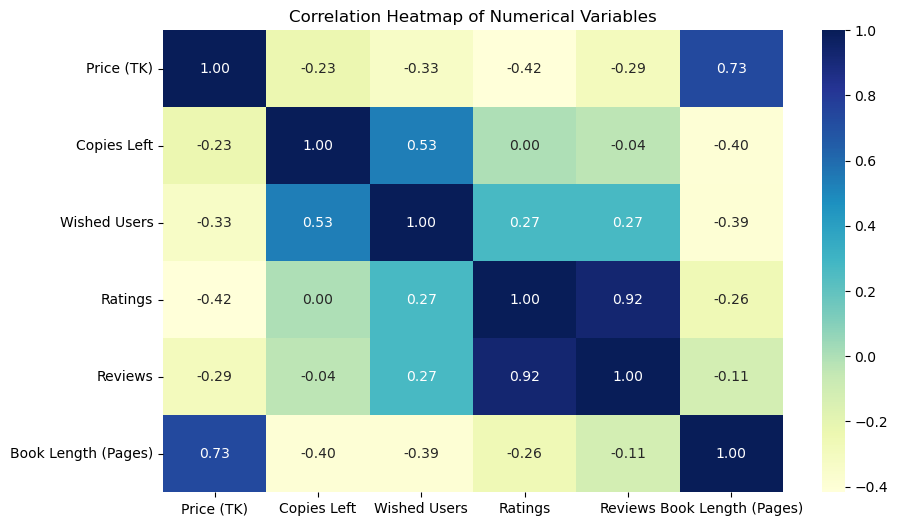

In [19]:
# Selecting only numerical columns including 'Book Length (Pages)'
numerical_data = data[['Price (TK)', 'Copies Left', 'Wished Users', 'Ratings', 'Reviews', 'Book Length (Pages)']]

# Calculating the Correlation Matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Display the Correlation Matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))

# Creating the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)

plt.title("Correlation Heatmap of Numerical Variables")

# Show the heatmap
plt.show()

## Initializing the model and Evaluating

As planned earlier and since categorical values should be considered, the model can only use the Random Forest algorythm to perform. Hence using Random Forest Method training model was done and next Mean Squared error was calculated to evaluate the model for the training data set.

Mean Squared Error: 63308.99449999999
R2 Score: 0.02486781365761248


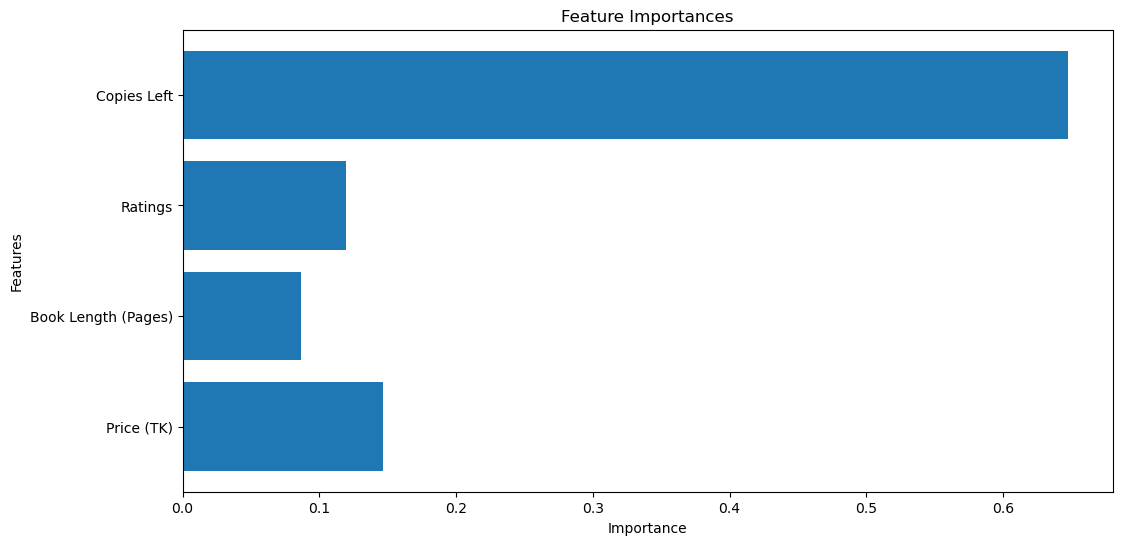

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initializing the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Trainning the model with the training data
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualize Feature Importances
feature_importances = model.feature_importances_
features = X_train.columns 

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In the next satge accuracy of the mode for both traing and testing data set were calculated and result is 76.4590% and 67.1837% respectively.
Since the accuracy is not up to the expected to the level and a fine tuning for the model was necessary.

In [86]:
# Calculating Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((y_train - model.predict(X_train)) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculating the accuracy
train_accuracy = 100 - mape_train
test_accuracy = 100 - mape_test

print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Training Accuracy: 76.45902672370714%
Test Accuracy: 67.18366846347976%


## Tuning the Model

Using the GridSearchCV tool and with diffent sets of values for the parameters for the model searching for the best fit model was performed.
According to the output,
'max_depth': 10, {'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50},  these are the values should be used in our model.


In [88]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Setting up the Random Forest model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Getting the best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)

# Using the best model to make predictions
best_model = grid_search.best_estimator_

# Evaluating the model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Reevaluating on training and test sets
print("Train R2: ", r2_score(y_train, y_train_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Train R2:  0.17289821865361166
Test R2:  0.24577356093752734


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
363 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\s

But we performed a evaluation and accuracy test for the fine tuned model but the accuracy was not changed.

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Best Parameters from GridSearchCV
best_params = {
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 50
}

# Initializing the model with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params, random_state=42)

# Training the model on the training data
rf_model_tuned.fit(X_train, y_train)

# Measuring the end time
end_time = time.time()

# Calculating the time taken in seconds
training_time = end_time - start_time
print(f"Time taken to train the model: {training_time:.2f} seconds")

# Making predictions on the training data
train_predictions = rf_model_tuned.predict(X_train)

# Evaluating the model on the training set
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

# Making predictions on the test data
test_predictions = rf_model_tuned.predict(X_test)

# Evaluating the model on the test set
test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

# Printing the results
print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculating Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((y_train - model.predict(X_train)) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculating the "accuracy"
train_accuracy = 100 - mape_train
test_accuracy = 100 - mape_test

print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Time taken to train the model: 147.87 seconds
Train R2: 0.17289821865361166
Test R2: 0.24577356093752734
Train MAE: 202.75834675324677
Test MAE: 185.63421230158733
Train MSE: 83099.89378997756
Test MSE: 48967.02021647245
Train RMSE: 288.27052188868976
Test RMSE: 221.2849299353041
Training Accuracy: 76.45902672370714%
Test Accuracy: 67.18366846347976%


However we tried the linear regression algorythm as well. Below is the output.

In [145]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initializing the Linear Regression model
linear_model = LinearRegression()

# Measuring the start time
start_time = time.time()

# Training the model on the training data
linear_model.fit(X_train, y_train)

# Measuring the end time
end_time = time.time()

# Calculating the time taken in seconds
training_time = end_time - start_time
print(f"Time taken to train the model: {training_time:.2f} seconds")

# Predicting on both training and testing data
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

# Evaluating the model's performance on training data
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluating the model's performance on testing data
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

# Printing the evaluation metrics
print("Training Data Evaluation:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R2 Score: {train_r2}")

print("\nTesting Data Evaluation:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R2 Score: {test_r2}")

# Calculating the "accuracy"
train_accuracy = 100 - mape_train
test_accuracy = 100 - mape_test

print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Time taken to train the model: 0.02 seconds
Training Data Evaluation:
MAE: 180.9890176142931
MSE: 59873.35723090177
RMSE: 244.6903292549621
R2 Score: 0.40407432353613737

Testing Data Evaluation:
MAE: 184.41611301510187
MSE: 40247.967713079575
RMSE: 200.61896149935473
R2 Score: 0.38007088784369947
Training Accuracy: 76.45902672370714%
Test Accuracy: 67.18366846347976%


## Conclusion

The Training Accuracy: 76.45902672370714% and Test Accuracy: 67.18366846347976%. The accuracy is not up to the expected level but the training and test accuracy are very close. The reasons could be insufficient data to train the model, features were given may be not relevant for the target variable, and the noise or too much variations within the data set.

## Refernces

1. https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm
2. https://www.geeksforgeeks.org/data-cleansing-introduction/
3. https://dnmtechs.com/optimizing-random-forest-classifier-with-gridsearchcv-in-python-3/